In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing

In [4]:
dataset_arr = df.to_numpy()
dataset_arr.shape

(284807, 31)

In [5]:
# Prepare Features and Labels with Bias Term
X = dataset_arr[ : , :-1].astype(np.float64)
y = dataset_arr[ : , -1].astype(np.uint8)

X.shape, y.shape

((284807, 30), (284807,))

In [6]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
X_b[0]

array([ 1.00000000e+00,  0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
        2.53634674e+00,  1.37815522e+00, -3.38320770e-01,  4.62387778e-01,
        2.39598554e-01,  9.86979013e-02,  3.63786970e-01,  9.07941720e-02,
       -5.51599533e-01, -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
        1.46817697e+00, -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,
        4.03992960e-01,  2.51412098e-01, -1.83067779e-02,  2.77837576e-01,
       -1.10473910e-01,  6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
        1.33558377e-01, -2.10530535e-02,  1.49620000e+02])

In [7]:
# One-Hot Encode Labels
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1
y_encoded[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=0.2,
    random_state=2,
    shuffle=True
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=0.125,
    random_state=2,
    shuffle=True
)

print("Train: ",X_train.shape, y_train.shape)
print("Val: ",X_val.shape, y_val.shape)
print("Test: ",X_test.shape, y_test.shape)

Train:  (199364, 31) (199364, 2)
Val:  (56962, 31) (56962, 2)
Test:  (28481, 31) (28481, 2)


In [9]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [10]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

## Train & Evaluation with Pytorch

In [11]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(
            input_dim,
            output_dim
        )
    def forward(self, x):
        return self.linear(x)

In [12]:
def compute_accuracy(y_hat, y_true):
    _, y_hat = torch.max(y_hat, dim=1)
    _, y_true = torch.max(y_true, dim=1)

    correct = (y_hat == y_true).sum().item()

    accuracy = (correct / len(y_true))

    return accuracy

In [13]:
lr = 0.01
epochs = 50
torch.manual_seed(2)
if torch.cuda.is_available():
    torch.cuda.manual_seed(2)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = SoftmaxRegression(
    input_dim, output_dim
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(), lr = lr
)

In [14]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(epochs):
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    y_hat = model(X_train)

    # Compute loss
    train_loss = criterion(y_hat, y_train)
    train_losses.append(train_loss.item())

    train_acc = compute_accuracy(y_hat, y_train)
    train_accs.append(train_acc)

    # Backward pass and optimization
    train_loss.backward()
    optimizer.step()

    model.eval()
    # Forward pass for validation data
    with torch.no_grad():
        y_val_hat = model(X_val)

        # Compute validation loss
        val_loss = criterion(y_val_hat, y_val)
        val_losses.append(val_loss.item())

        val_acc = compute_accuracy(y_val_hat, y_val)
        val_accs.append(val_acc)

    print(f"\nEpoch {epoch + 1} \tTraing loss: {train_loss:.3f}\tValidation loss:{val_loss:.3f}")





Epoch 1 	Traing loss: 0.722	Validation loss:0.712

Epoch 2 	Traing loss: 0.712	Validation loss:0.702

Epoch 3 	Traing loss: 0.702	Validation loss:0.693

Epoch 4 	Traing loss: 0.692	Validation loss:0.683

Epoch 5 	Traing loss: 0.683	Validation loss:0.674

Epoch 6 	Traing loss: 0.674	Validation loss:0.665

Epoch 7 	Traing loss: 0.665	Validation loss:0.656

Epoch 8 	Traing loss: 0.656	Validation loss:0.647

Epoch 9 	Traing loss: 0.647	Validation loss:0.638

Epoch 10 	Traing loss: 0.638	Validation loss:0.630

Epoch 11 	Traing loss: 0.630	Validation loss:0.621

Epoch 12 	Traing loss: 0.621	Validation loss:0.613

Epoch 13 	Traing loss: 0.613	Validation loss:0.605

Epoch 14 	Traing loss: 0.605	Validation loss:0.597

Epoch 15 	Traing loss: 0.597	Validation loss:0.590

Epoch 16 	Traing loss: 0.590	Validation loss:0.582

Epoch 17 	Traing loss: 0.582	Validation loss:0.575

Epoch 18 	Traing loss: 0.575	Validation loss:0.567

Epoch 19 	Traing loss: 0.567	Validation loss:0.560

Epoch 20 	Traing los

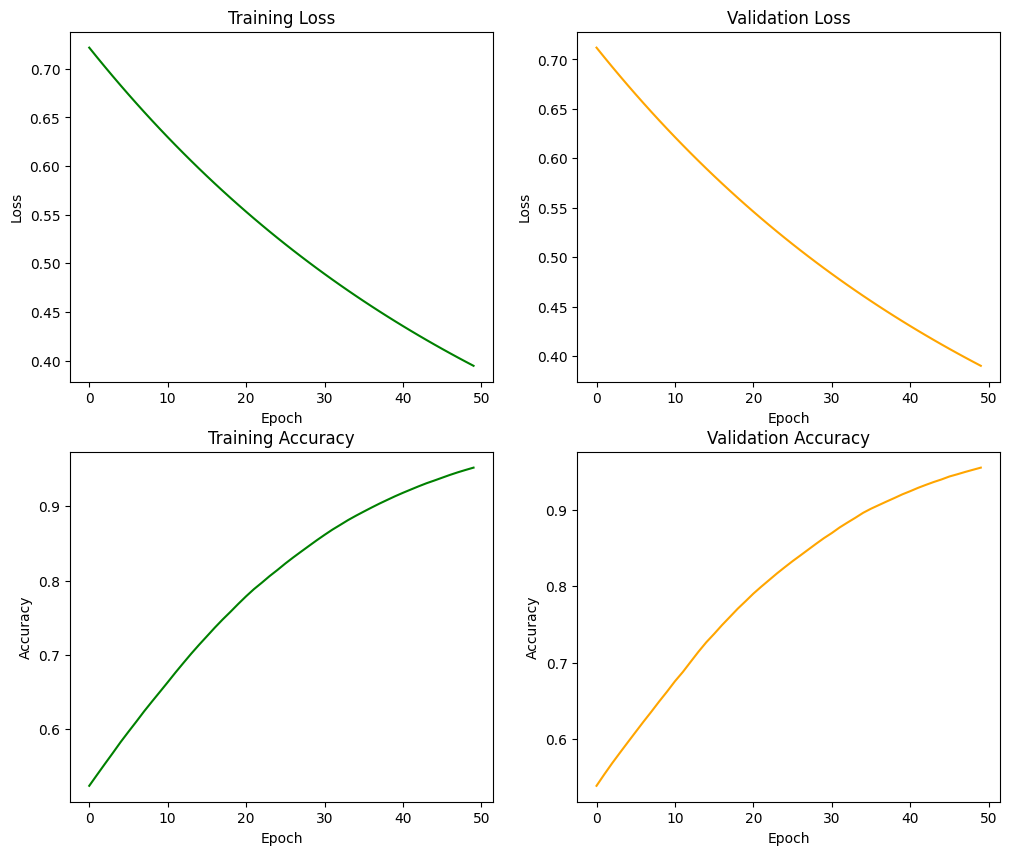

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [16]:
# Val set
model.eval()
with torch.no_grad():
    y_hat = model(X_val)
    val_set_acc = compute_accuracy(y_hat, y_val)
    print('Evaluation on validation set:')
    print(f'Accuracy: {val_set_acc}')

Evaluation on validation set:
Accuracy: 0.9547593132263614


In [17]:
# Test set
model.eval()
with torch.no_grad():
    y_hat = model(X_test)
    test_set_acc = compute_accuracy(y_hat, y_test)
    print('Evaluation on test set:')
    print(f'Accuracy: {test_set_acc}')

Evaluation on test set:
Accuracy: 0.9549875355500158
